In [23]:

from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.config_tickers import DOW_30_TICKER

from online_algos import CRP

import pandas as pd
import matplotlib.pyplot as plt


PLOT_DATES_TEST_START = '2021-02-09'
PLOT_DATES_TEST_END = '2024-01-01'
# TODO need to fix first day off by one issue

ensemble_results_file = 'result.csv'

# PLOT_DATES_TEST_START = '2022-01-03'
# PLOT_DATES_TEST_END = '2022-12-30'

# ensemble_results_file = 'result2022.csv'


value_to_remove = "DOW"
# # Create a new list without the specified string
DOW_30_TICKER = [x for x in DOW_30_TICKER if x != value_to_remove]


# test = [
# "AXP",
#     "AMGN",
#     "AAPL",
#     "BA",
#     "CAT"]


df = YahooDownloader(start_date = PLOT_DATES_TEST_START,
                     end_date = PLOT_DATES_TEST_END,
                     ticker_list = DOW_30_TICKER).fetch_data()


print(df.head())

# Count rows with any null values
null_rows_count = df.isnull().any(axis=1).sum()

print(f"Number of rows containing null values: {null_rows_count}")


print("Check for no-nulls")
print(df.notnull().all().all())

assert df.notnull().all().all()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Shape of DataFrame:  (21112, 8)
         date        open        high         low       close    volume   tic  \
0  2021-02-09  136.619995  137.880005  135.850006  133.343338  76774200  AAPL   
1  2021-02-09  237.279999  237.669998  234.789993  210.427582   1996500  AMGN   
2  2021-02-09  127.650002  127.660004  126.199997  120.796021   2175000   AXP   
3  2021-02-09  210.600006  216.729996  208.899994  215.119995  13615700    BA   
4  2021-02-09  197.539993  198.660004  194.889999  183.065536   2331600   CAT   

   day  
0    1  
1    1  
2    1  
3    1  
4    1  
Number of rows containing null values: 0
Check for no-nulls
True


date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
tic        object
day         int32
dtype: object
             date        open        high         low       close    volume  \
0      2021-02-09  136.619995  137.880005  135.850006  133.343338  76774200   
1      2021-02-09  237.279999  237.669998  234.789993  210.427582   1996500   
2      2021-02-09  127.650002  127.660004  126.199997  120.796021   2175000   
3      2021-02-09  210.600006  216.729996  208.899994  215.119995  13615700   
4      2021-02-09  197.539993  198.660004  194.889999  183.065536   2331600   
...           ...         ...         ...         ...         ...       ...   
21107  2023-12-29  525.979980  528.239990  523.919983  520.342346   2080100   
21108  2023-12-29  260.570007  261.459991  259.670013  258.866302   4074600   
21109  2023-12-29   37.380001   37.759998   37.320000   35.344772  16205200   
21110  2023-12-29   26.440001   26.629999   25.75000

<Axes: xlabel='date'>

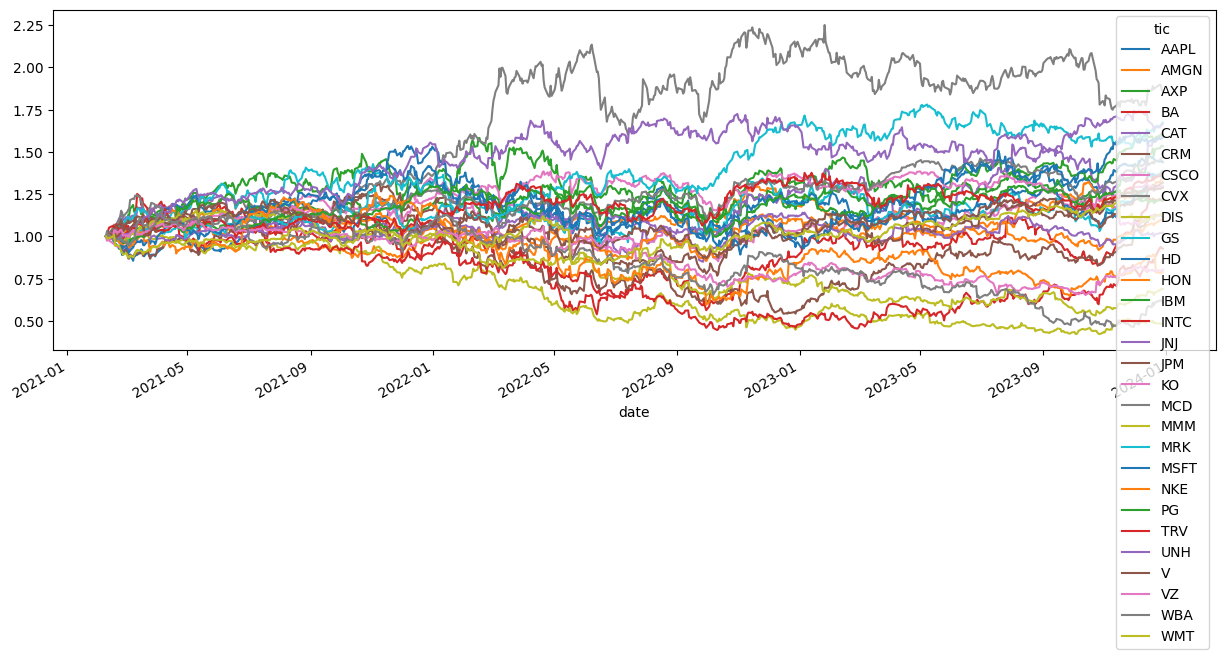

In [24]:
df = pd.DataFrame(df)

print(df.dtypes)
print(df)

# Pivot the DataFrame
pivot_df = df.pivot(index='date', columns='tic', values='close')

print(pivot_df)

pivot_df.index = pd.to_datetime(pivot_df.index)

(pivot_df / pivot_df.iloc[0,:]).plot()

c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.10
    Sharpe ratio: 0.62 ± 0.64
    Ulcer index: 1.35
    Information ratio (wrt benchmark): 0.00
    Benchmark sharpe: 0.62 ± 0.64
    Appraisal ratio (wrt benchmark): -0.00 ± 0.83
    Beta / Alpha: 1.00 / -0.000%
    Annualized return: 9.25%
    Annualized volatility: 15.04%
    Longest drawdown: 388 days
    Max drawdown: 21.56%
    Winning days: 53.0%
    Annual turnover: 2.3
        


c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\Thesis\online_algos\algo.py:242: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = S / S.shift(1).fillna(method="ffill")
c:\Users\bencj\Desktop\Econ4\The

Summary:
    Profit factor: 1.09
    Sharpe ratio: 0.60 ± 0.64
    Ulcer index: 1.29
    Information ratio (wrt benchmark): -48.86
    Benchmark sharpe: 0.62 ± 0.64
    Appraisal ratio (wrt benchmark): -2.18 ± 0.59
    Beta / Alpha: 1.00 / -0.228%
    Annualized return: 9.02%
    Annualized volatility: 15.04%
    Longest drawdown: 477 days
    Max drawdown: 21.71%
    Winning days: 53.0%
    Annual turnover: 2.3
        
tic             AAPL      AMGN       AXP        BA       CAT       CRM  \
date                                                                     
2021-02-09  0.034483  0.034483  0.034483  0.034483  0.034483  0.034483   
2021-02-10  0.034483  0.034483  0.034483  0.034483  0.034483  0.034483   
2021-02-11  0.034483  0.034483  0.034483  0.034483  0.034483  0.034483   
2021-02-12  0.034483  0.034483  0.034483  0.034483  0.034483  0.034483   
2021-02-16  0.034483  0.034483  0.034483  0.034483  0.034483  0.034483   
...              ...       ...       ...       ...       

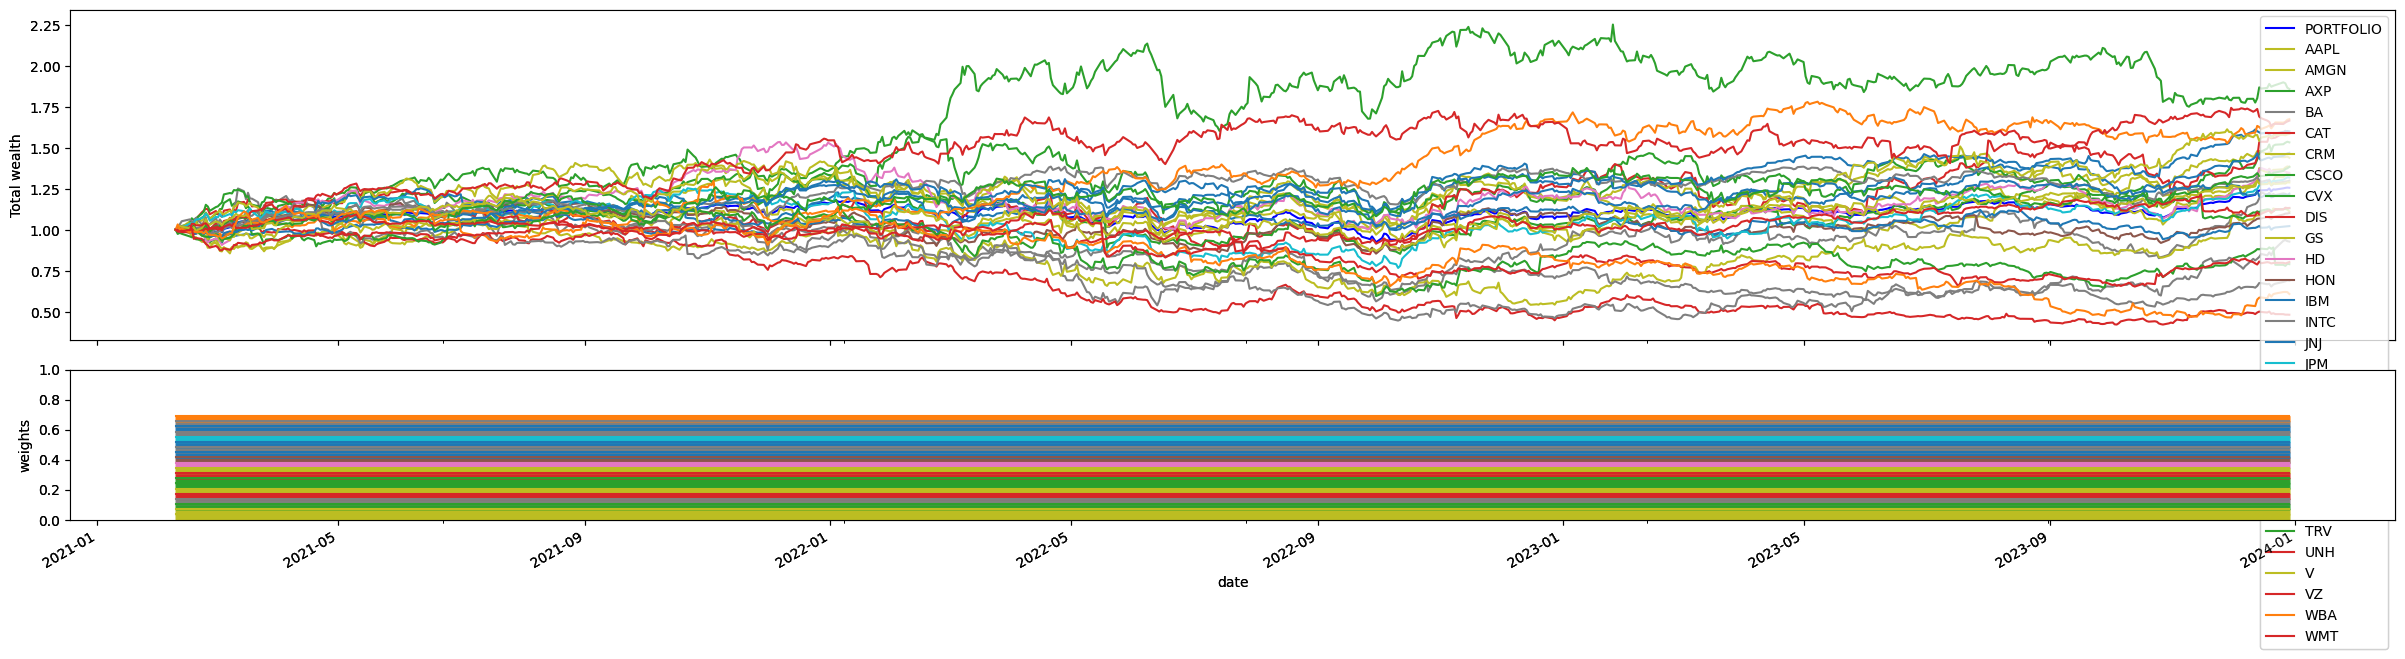

In [25]:
algo = CRP()
result = algo.run(pivot_df)

crp_B = result.B
crp_X = result.X
print(result.summary())
result.plot();



# Here try setting a transaction fee
result.fee = 0.001



crp_B_fee = result.B
crp_X_fee = result.X
print(result.summary())

print(result.B)
print(result.X)

%matplotlib inline
result.plot();

['Date', 'AAPL', 'AMGN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'V', 'VZ', 'WBA', 'WMT']
[0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276
 0.03448276 0.03448276 0.03448276 0.03448276 0.03448276]
Total of each: [34402.58120727539 34299.69583129883 34426.86584472656 34419.19921875
 34416.320861816406 34405.460510253906 34448.07633972168 34439.05564117432
 34359.624755859375 34200.29830932617 34335.18347167969 34282.00744628906
 34404.91304016113 34428.98377990723 34318.5411529541 34421.50467681885
 34419.26058959961 34315.62016296387 34412.92094421387 34440.556674957275
 34235.09826660156 34365.14874267578 34351.94528961182 34366.291442871094
 34375.97015

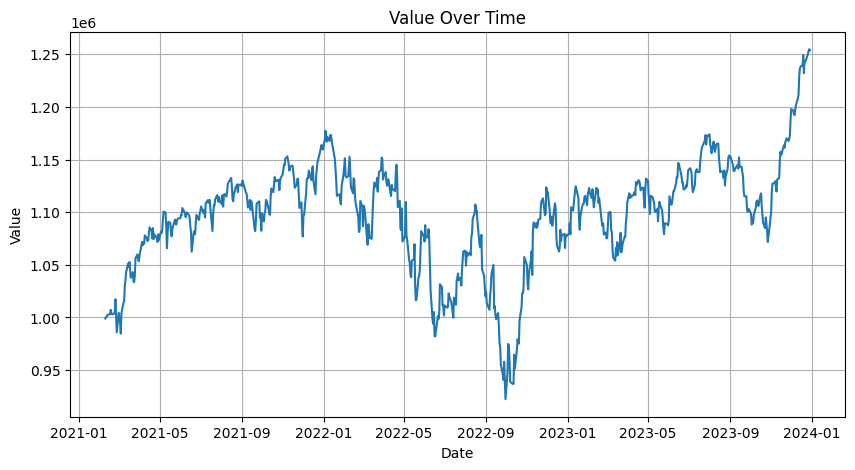

In [26]:
############################
# Run CRP for one defined set of weights:
############################


import numpy as np
import pandas as pd

# Best Target Weights: [0.05134159 0.05536591 0.03931186 0.00328734 0.03819066 0.03555904
#  0.07138025 0.04149361 0.00340795 0.01783727 0.04918175 0.03040992
#  0.06165634 0.00179018 0.05213284 0.00264511 0.0477926  0.00020151
#  0.01354131 0.03167825 0.07287608 0.04810141 0.04723473 0.05420885
#  0.03467866 0.02201975 0.0513923  0.01362611 0.00765681]

new_column_names = ['Date'] + [f'{col}' for col in pivot_df.columns]

print(new_column_names)

# Convert to the desired format
X = pivot_df.reset_index()
X.columns = new_column_names

# Uniform base case
target_weights = np.ones(len(X.columns)-1) / (len(X.columns)-1)  # target weights for each asset

print(target_weights)

# TODO adjust this to the correct value
transaction_cost = 0.001

# Number of steps before the portfolio is allowed to rerebalance
rebalance_step = 1

# TODO still nto as good as a simple buy and hold
initial_cash = 1000000
initial_shares = np.zeros(len(target_weights))

net_worth=[]
transaction_fees=[]

def rebalance_portfolio(cash, shares, target_weights, prices):
    
    # Available amount for purchases of each stock, must factor in the transaction cost 
    current_wealth = (np.sum(prices * shares) + cash) / (1 + transaction_cost)

    target_values = (target_weights * current_wealth)
    target_shares = target_values // (prices)

    shares_to_change = target_shares - shares
    sell_shares = np.where(shares_to_change < 0, -shares_to_change, 0)
    buy_shares = np.where(shares_to_change > 0, shares_to_change, 0)

    # Calculate cash after selling shares
    cash += np.sum(sell_shares * prices)

    cash -= np.sum(buy_shares * prices)

    transaction_fee = (np.sum(sell_shares * prices) + np.sum(buy_shares * prices)) * transaction_cost
    # Sum up all the transaction fees
    transaction_fees.append(transaction_fee)

    shares = target_shares
    remaining_cash = cash - transaction_fee

    assert remaining_cash >= 0
    
    return shares, remaining_cash

portfolio_shares = initial_shares.copy()
portfolio_cash = initial_cash

rebalance_i = 0
# Rebalance at each month
for idx, row in X.iterrows():
    # print(f"\nRebalancing on {row[0].strftime('%Y-%m-%d')}")
    price_per_share = row[1:].values

    rebalance_i -= 1
    if rebalance_i <= 0:
        portfolio_shares, portfolio_cash = rebalance_portfolio(
            portfolio_cash, portfolio_shares, target_weights, price_per_share)
        rebalance_i = rebalance_step
    # print(f"New Portfolio Shares: {portfolio_shares}")
    # print(f"Prices: {row}")

    # print(f"Total of each: {portfolio_shares * price_per_share}")
    # print(f"Cash: {portfolio_cash:.2f}")

    # Calculate total shares
    total_shares = np.sum(portfolio_shares)

    # Calculate the ratio of each share
    share_ratios = portfolio_shares / total_shares

    print(f"Total of each: {portfolio_shares * price_per_share}")
    print(target_weights)
    

    asset_wealth = np.sum(portfolio_shares * price_per_share)
    print(asset_wealth)

    net_worth.append(asset_wealth + portfolio_cash)

print("\nFinal Portfolio:")
print(f"Shares: {portfolio_shares}")
print(f"Total of each: {portfolio_shares * price_per_share}")
print(f"Cash: {portfolio_cash:.2f}")
print(f"Transaction fees: {np.sum(np.array(transaction_fees))}")


print(f"Final Net Worth: {net_worth[-1]}")

# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(X['Date'], net_worth)
plt.title('Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()


# Write this out to a csv file, with date and net worth
df = pd.DataFrame(net_worth, columns=['CRP_net_worth'])
if len(df) == len(X):
    df['Date'] = X['Date']
    df.set_index('Date', inplace=True)
else:
    raise ValueError("DataFrames do not have the same number of rows.")
df.to_csv('CRP_net_worth.csv')


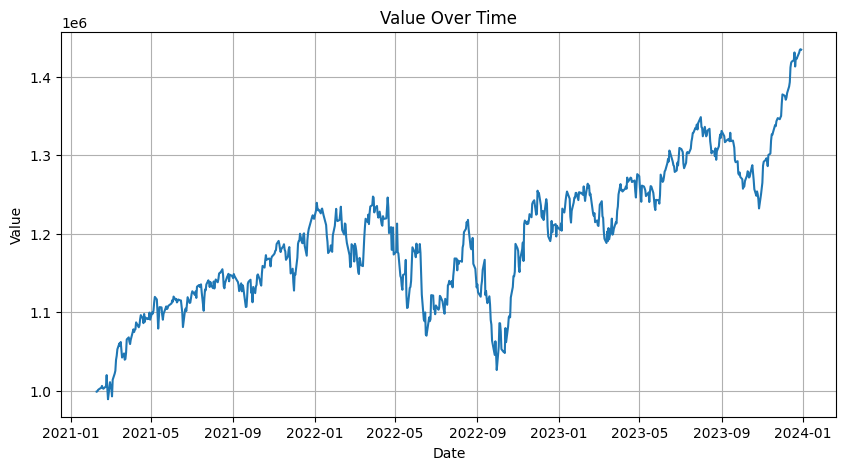


Best Target Weights: [0.07197882 0.00232957 0.0516554  0.03806047 0.04327071 0.01849019
 0.03150024 0.07106434 0.01069774 0.02649173 0.05532125 0.01360371
 0.06695467 0.03488699 0.01509636 0.01452861 0.02896707 0.07363359
 0.00281647 0.03926397 0.02571967 0.02891994 0.02983932 0.07001654
 0.05249487 0.05271667 0.00187074 0.0020695  0.02574088]
Maximized Net Worth: 1434280.5378285751


In [27]:
#####################################################
# BCRP - Run it many times and find the best random weights
#####################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def prepare_data(pivot_df):
    new_column_names = ['Date'] + [f'{col}' for col in pivot_df.columns]
    X = pivot_df.reset_index()
    X.columns = new_column_names
    return X

def rebalance_portfolio(cash, shares, target_weights, prices, transaction_cost=0.001):
    current_wealth = np.sum(prices * shares) + cash / (1 + transaction_cost)
    target_values = target_weights * current_wealth
    target_shares = target_values // prices
    shares_to_change = target_shares - shares
    sell_shares = np.where(shares_to_change < 0, -shares_to_change, 0)
    buy_shares = np.where(shares_to_change > 0, shares_to_change, 0)
    
    cash += np.sum(sell_shares * prices)
    cash -= np.sum(buy_shares * prices)

    transaction_fee = (np.sum(sell_shares * prices) + np.sum(buy_shares * prices)) * transaction_cost
    shares = target_shares
    remaining_cash = cash - transaction_fee

    assert remaining_cash >= 0
    
    return shares, remaining_cash

# Note I am rebalancing every X days, this often does even better by optimizing for the best BAH weights and not rebalancing
def evaluate_portfolio(X, target_weights, initial_cash=1000000, rebalance_step=1):
    initial_shares = np.zeros(len(target_weights))
    portfolio_shares = initial_shares.copy()
    portfolio_cash = initial_cash
    net_worth = []
    rebalance_i = 0
    
    for _, row in X.iterrows():
        price_per_share = row[1:].values
        rebalance_i -= 1
        if rebalance_i <= 0:
            portfolio_shares, portfolio_cash = rebalance_portfolio(
                portfolio_cash, portfolio_shares, target_weights, price_per_share)
            rebalance_i = rebalance_step
        
        asset_wealth = np.sum(portfolio_shares * price_per_share)
        net_worth.append(asset_wealth + portfolio_cash)
    
    return net_worth

def find_best_weights(pivot_df, num_iterations=1000):
    X = prepare_data(pivot_df)
    best_net_worth = -np.inf
    best_weights = None
    
    for _ in range(num_iterations):
        random_values = np.random.rand(len(X.columns) - 1)
        target_weights = random_values / np.sum(random_values)
        net_worth = evaluate_portfolio(X, target_weights)
        final_net_worth = net_worth[-1]
        
        if final_net_worth > best_net_worth:
            best_net_worth = final_net_worth
            best_weights = target_weights
    
    return best_weights, best_net_worth

# Find the best weights
best_weights, best_net_worth = find_best_weights(pivot_df)

# Evaluate portfolio with the best weights
X = prepare_data(pivot_df)
net_worth = evaluate_portfolio(X, best_weights)

# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(X['Date'], net_worth)
plt.title('Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

print("\nBest Target Weights:", best_weights)
print("Maximized Net Worth:", best_net_worth)




# Write this out to a csv file, with date and net worth
df = pd.DataFrame(net_worth, columns=['BCRP_net_worth'])
if len(df) == len(X):
    df['Date'] = X['Date']
    df.set_index('Date', inplace=True)
else:
    raise ValueError("DataFrames do not have the same number of rows.")
df.to_csv('BCRP_net_worth.csv')


                0
0    9.990033e+05
1    9.992571e+05
2    1.000928e+06
3    1.001753e+06
4    1.004112e+06
..            ...
723  1.422336e+06
724  1.430410e+06
725  1.433862e+06
726  1.434811e+06
727  1.434281e+06

[728 rows x 1 columns]
          Date  BCRP Net Worth
0   2021-02-09    9.990033e+05
1   2021-02-10    9.992571e+05
2   2021-02-11    1.000928e+06
3   2021-02-12    1.001753e+06
4   2021-02-16    1.004112e+06
..         ...             ...
723 2023-12-22    1.422336e+06
724 2023-12-26    1.430410e+06
725 2023-12-27    1.433862e+06
726 2023-12-28    1.434811e+06
727 2023-12-29    1.434281e+06

[728 rows x 2 columns]
                ensemble           dji
date                                  
2021-04-06  1.000000e+06  1.000000e+06
2021-04-07  9.999256e+05  1.000479e+06
2021-04-08  1.000077e+06  1.002194e+06
2021-04-09  1.003741e+06  1.011079e+06
2021-04-12  1.003101e+06  1.009427e+06
...                  ...           ...
2023-09-28  9.934112e+05  1.007063e+06
2023-09-29  9

<Figure size 1500x500 with 0 Axes>

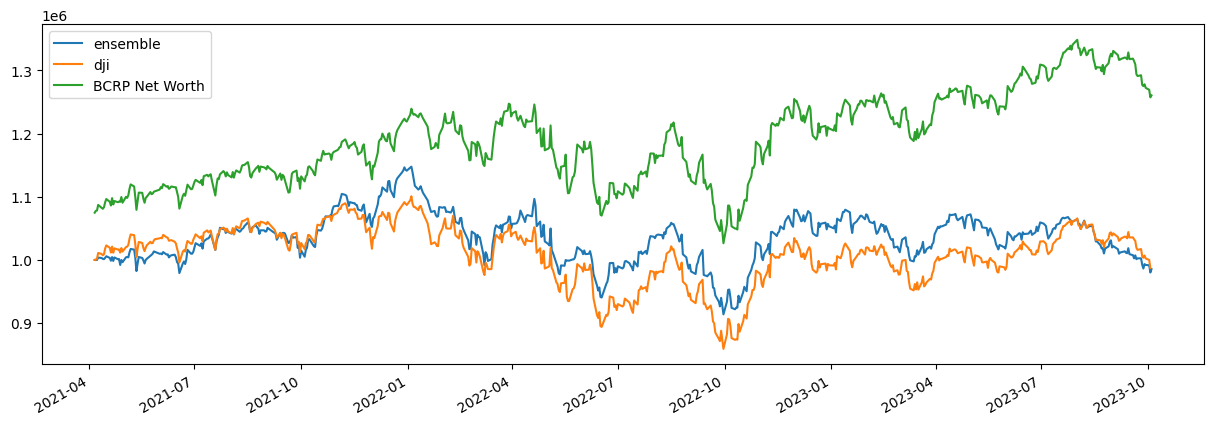

In [28]:
result = pd.DataFrame()

df = pd.DataFrame(net_worth)

print(df)

# Combine the DataFrames side-by-side
combined_df = pd.concat([X.Date, df], axis=1)

combined_df.columns = ["Date", "BCRP Net Worth"]
print(combined_df)

combined_df.set_index('Date', inplace=True)

# TODO Change result period to use saved file
result = pd.read_csv(ensemble_results_file)

result.set_index('date', inplace=True)

result.index = pd.to_datetime(result.index)

print(result)

# Join DataFrames on date index
merged_df = result.join(combined_df, how='inner')
print(merged_df)


%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
merged_df.plot();

==============Get Baseline Stats===========


[*********************100%***********************]  1 of 1 completed

Shape of DataFrame:  (727, 8)
Annual return          0.065817
Cumulative returns     0.201884
Annual volatility      0.150714
Sharpe ratio           0.498889
Calmar ratio           0.299976
Stability              0.000069
Max drawdown          -0.219408
Omega ratio            1.088298
Sortino ratio          0.711059
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.010215
Daily value at risk   -0.018690
dtype: float64
df_dji:            date           dji
0   2021-02-09  1.000000e+06
1   2021-02-10  1.001975e+06
2   2021-02-11  1.001749e+06
3   2021-02-12  1.002632e+06
4   2021-02-16  1.004683e+06
..         ...           ...
723 2023-12-22  1.191553e+06
724 2023-12-26  1.196632e+06
725 2023-12-27  1.200176e+06
726 2023-12-28  1.201884e+06
727 2023-12-29           NaN

[728 rows x 2 columns]
df_dji:                       dji
date                    
2021-02-09  1.000000e+06
2021-02-10  1.001975e+06
2021-02-11  1.001749e+06
2021-02-12  1.002632e+06

<Figure size 1500x500 with 0 Axes>

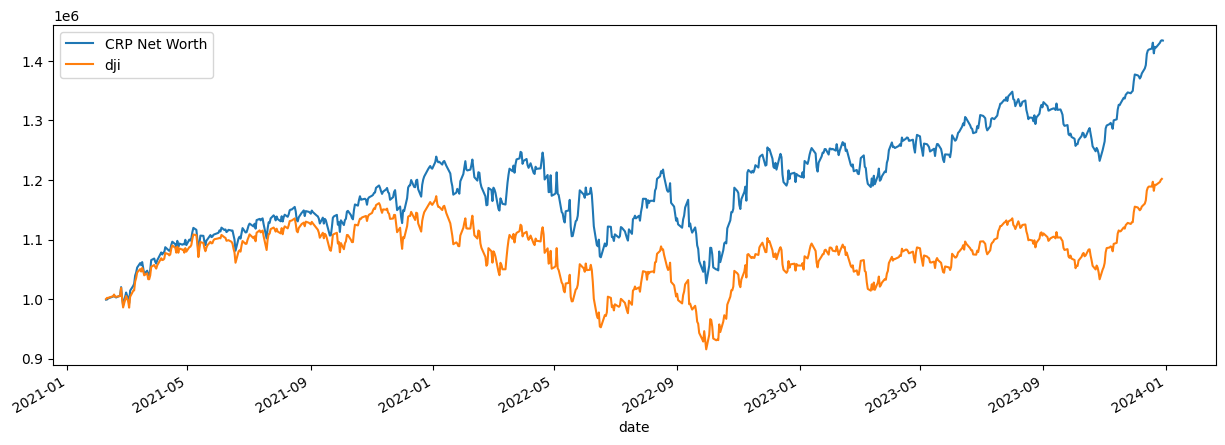

In [29]:
from finrl.plot import backtest_stats,  get_baseline

first_date = combined_df.index.min()
last_date = combined_df.index.max()

print("==============Get Baseline Stats===========")
df_dji_ = get_baseline(
        ticker="^DJI",
        start = first_date,
        end = last_date)

stats = backtest_stats(df_dji_, value_col_name = 'close')


df_dji = pd.DataFrame()
df_dji['date'] = combined_df.index
df_dji['dji'] = df_dji_['close'] / df_dji_['close'][0] * initial_cash
print("df_dji: ", df_dji)
df_dji = df_dji.set_index(df_dji.columns[0])
print("df_dji: ", df_dji)


combined_df = pd.DataFrame({'date': combined_df.index, 'CRP Net Worth': combined_df['BCRP Net Worth']})
combined_df = combined_df.set_index('date')

print("df_result_bah.columns: ", combined_df.columns)

print("df_result_bah: ", combined_df)
print("==============Compare to DJIA===========")
result = pd.DataFrame()

result = pd.merge(combined_df, df_dji, left_index=True, right_index=True)
print("result: ", result)


%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();